In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive


In [4]:
data = pd.read_csv("/gdrive/MyDrive/Colab Notebooks/ECE219/Project 4/Suicide Rate/master.csv")

### **Data Explore**

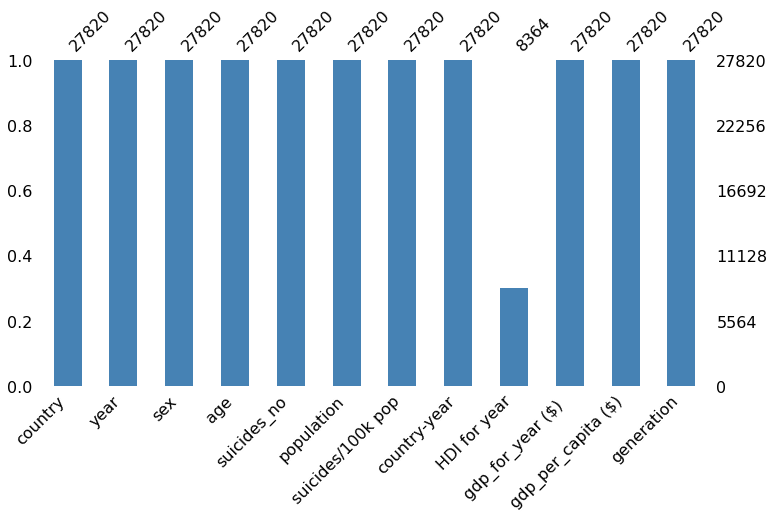

In [ ]:
import missingno as msno
msno.bar(data, figsize =(12,6), color='steelblue')

# Data Inspection  Q1-4 

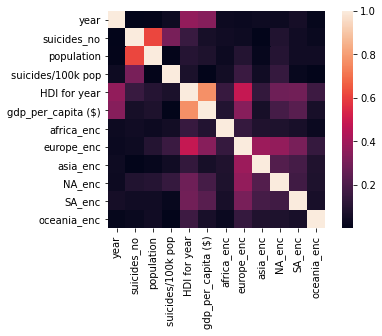

In [ ]:
sns.heatmap(np.abs(data.corr(method='pearson')),square = True)

*ANSWER* Q1 

For 

*   suicides_no : the highest absolute correlation with this target variable is "population", which means, the more people there is in a country; the higher amount of suicide counts in given age group. This is intuitive. 
*   suicides/100k pop : other than "suicides_no" which is also a target varible. Suicides/100k pop has the strongest absolute correlation with "year", which means, as the year goes on, more people per 100k population died by committing suicide. 



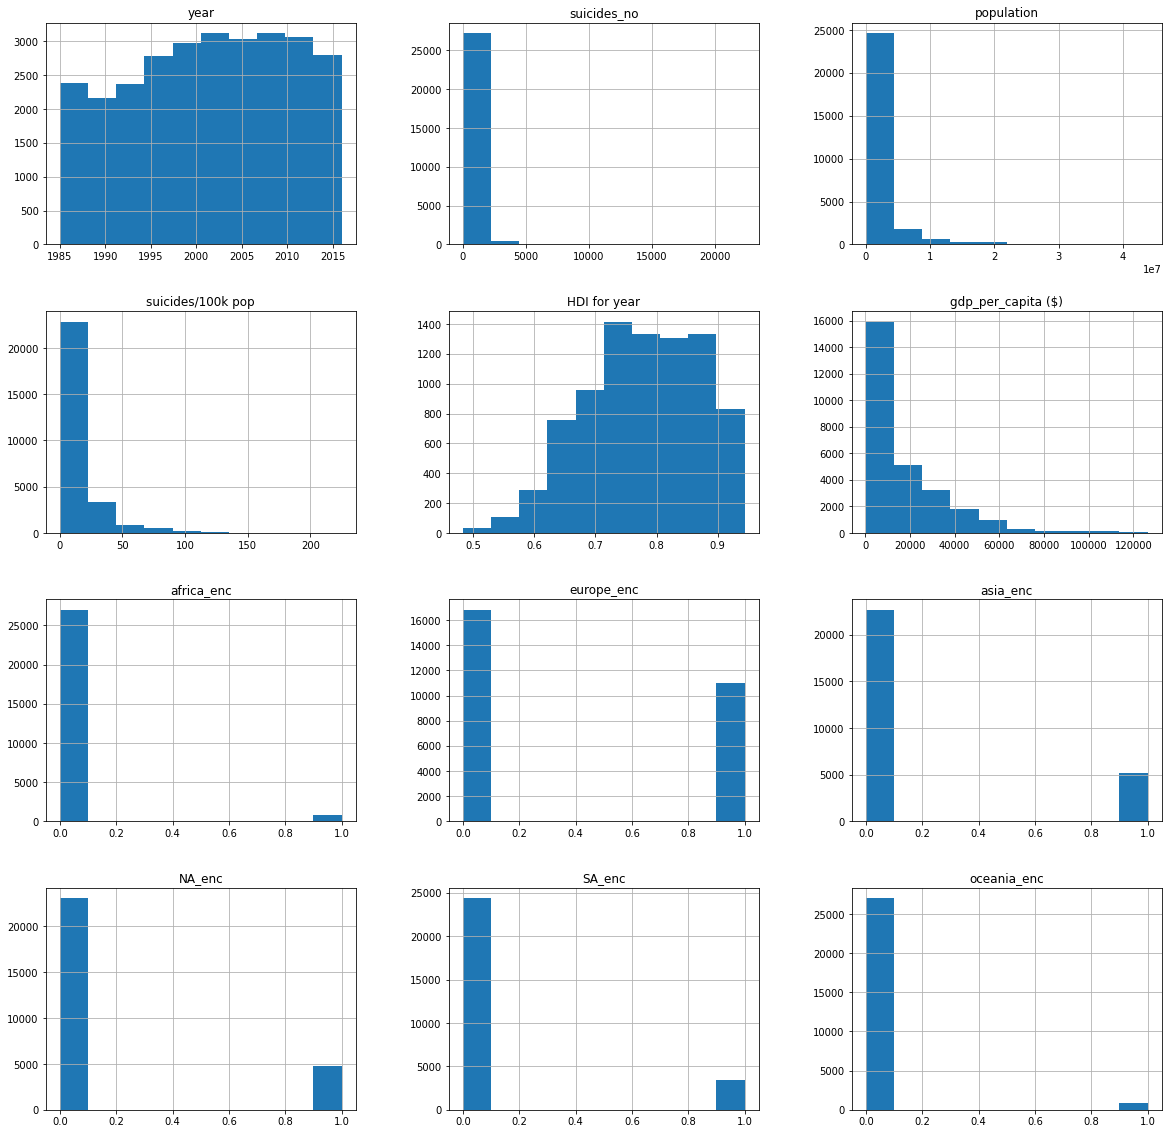

In [ ]:
data.hist(figsize=(20,20))
plt.show()

*ANSWER* Q2 
 
Histograms plotted as shown; 
Some numerical features have high skewness. We could preprocess by log transformation, square root transformation, and box-cox transformation which in this case, since all the numerical data is positive, can be done. 

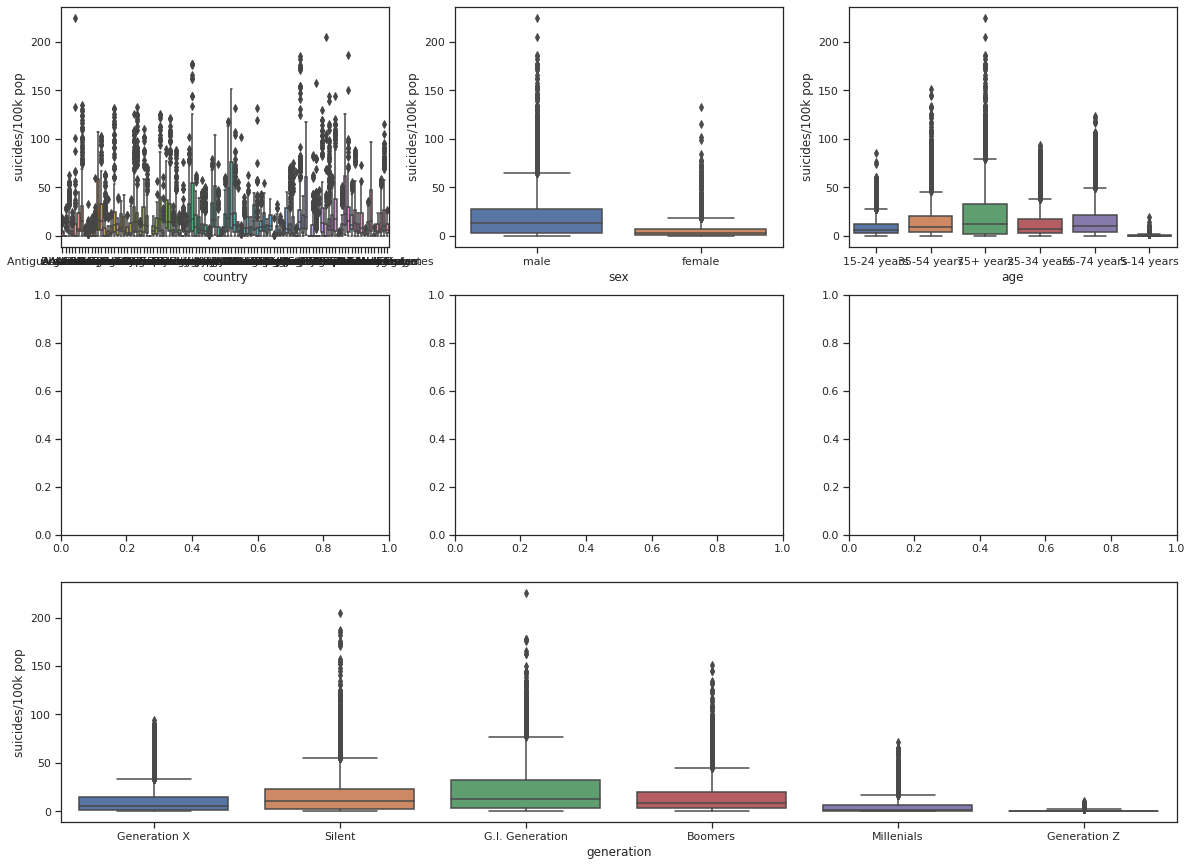

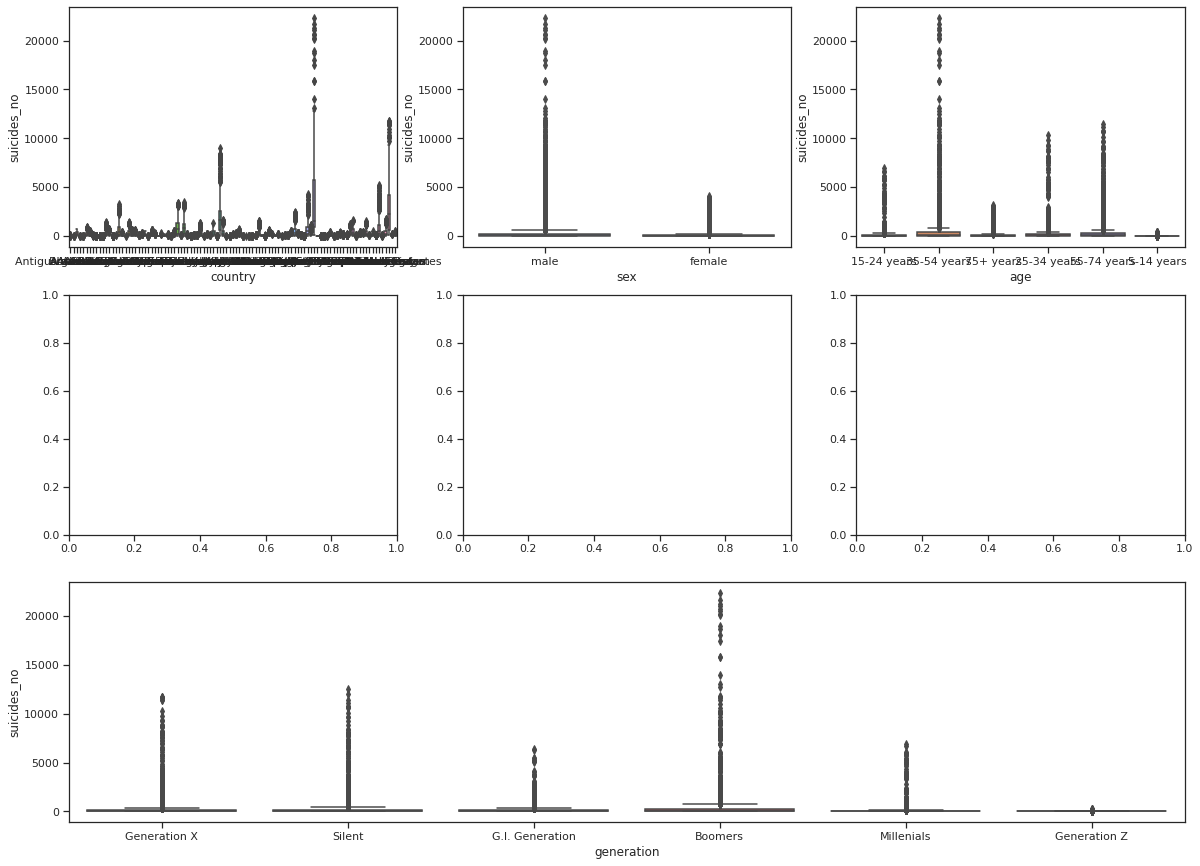

In [ ]:
sns.set(style="ticks", color_codes=True)
C_feature = ['country','sex','age','generation']
num_feature = len(C_feature)
target_feature = ['suicides/100k pop','suicides_no']
for target_name in target_feature:
  fig, axs = plt.subplots(3,3,figsize=(20,15))
  for i in range(num_feature-1):
    sns.boxplot(x=C_feature[i],y=target_name, data=data, ax=axs[i//3][i%3])
  ax=plt.subplot(3,1,3)
  sns.boxplot(x=C_feature[-1], y=target_name, data=data, ax=ax)
  plt.show()

In [ ]:
columns = data.columns
print(columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation', 'africa_enc',
       'europe_enc', 'asia_enc', 'NA_enc', 'SA_enc', 'oceania_enc'],
      dtype='object')


country
Russian Federation    1209742
United States         1034013
Japan                  806902
France                 329127
Ukraine                319950
Germany                291262
Republic of Korea      261730
Brazil                 226613
Poland                 139098
United Kingdom         136805
Name: suicides_no, dtype: int64

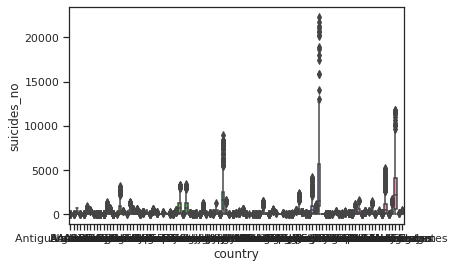

In [ ]:
country_no = sns.boxplot(x=data["country"], y=data["suicides_no"])
country_list = data.groupby('country').suicides_no.sum().sort_values(ascending= False)
country_list.head(10)

,suicides/100k pop
country,
Russian Federation,11305.13
Lithuania,10588.88
Hungary,10156.07
Kazakhstan,9519.52
Republic of Korea,9350.45
Austria,9076.23
Ukraine,8931.66
Japan,8025.23
Finland,7924.11


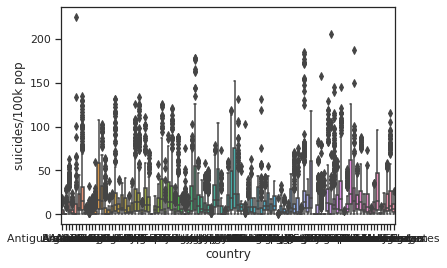

In [ ]:
country_cap = sns.boxplot(x=data["country"], y=data["suicides/100k pop"])
country_list_cap = data.groupby('country').agg({"suicides/100k pop":'sum'})
country_list_cap.sort_values(by= ("suicides/100k pop"), ascending = False).iloc[0:10]

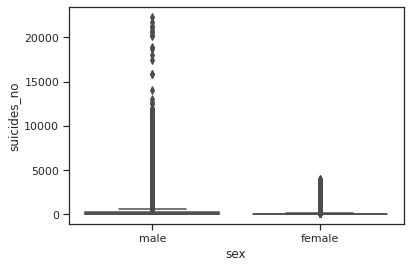

In [ ]:
sex_no = sns.boxplot(x=data["sex"], y=data["suicides_no"])

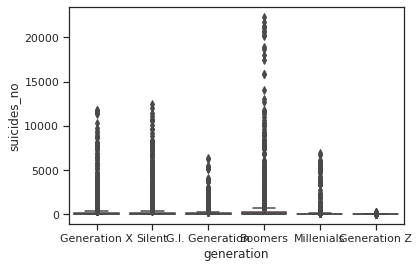

In [ ]:
generation_no = sns.boxplot(x=data["generation"], y=data["suicides_no"])

*ANSWER* Q3
 
Box plotted as shown; 
Seems like more men, and more boomers have the highest counts of suicide. Looks like big countries like Russia & United States have the highest suicide numbers. And the data on suicide number / 100k population in categorical sense, Sex & generation categories haven't changed much, but the top suicide rate countries become Russia, Lithuania, and Hungary. 

# Question 5 Top 10 Countries with time span

In [5]:
data1 = data
data1['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [6]:
#top 10 by years of span 
data1.groupby('country').agg(num_years = pd.NamedAgg(column = 'year',aggfunc = lambda x: (max(x)-min(x)))).sort_values('num_years',ascending = False).head(10)
top10_countries = ['Thailand','Netherlands','Iceland','Austria', 'Grenada','Mauritius','Colombia','Malta','Japan','Puerto Rico']

In [7]:
data2= data1[data1["country"].isin(top10_countries)]

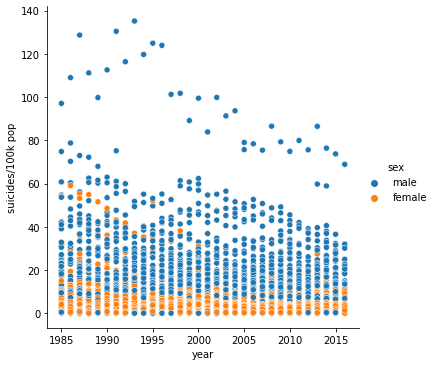

In [8]:
sns.relplot(x="year", y="suicides/100k pop",hue="sex", data=data2)

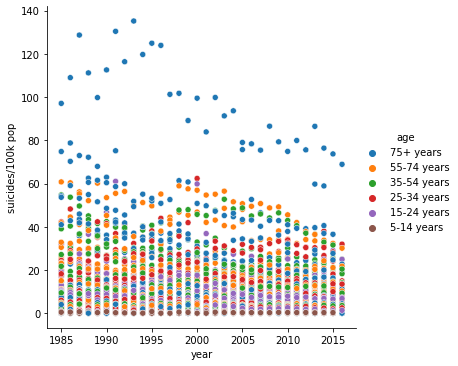

In [9]:
sns.relplot(x="year", y="suicides/100k pop",hue="age", data=data2);

# addition data exploration


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

DataError: ignored

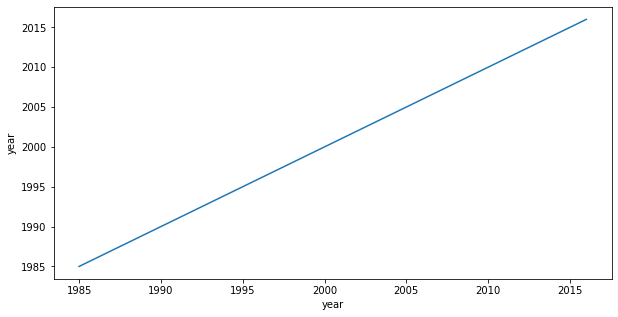

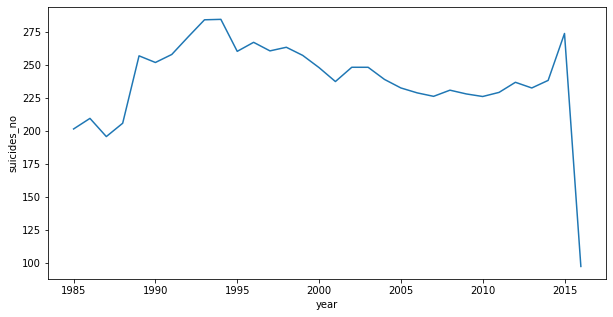

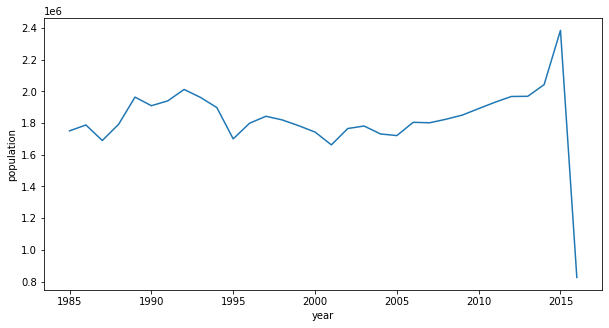

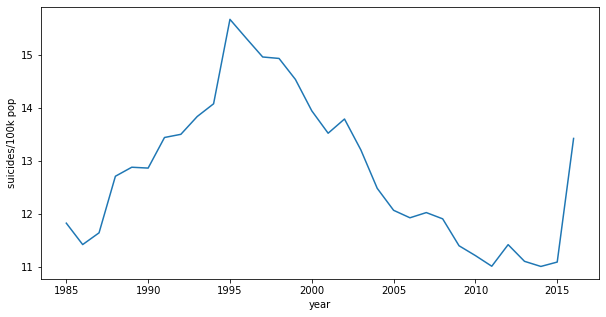

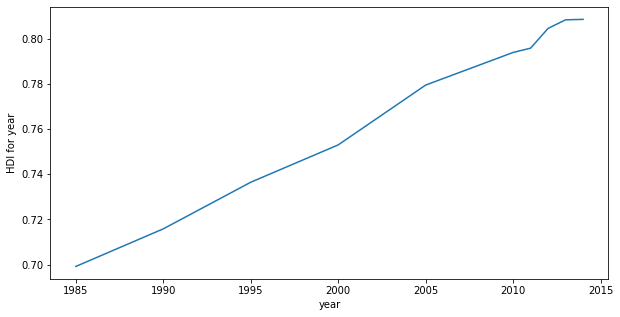

In [ ]:
## time based analysis using mean value of group by year value
cols = data2.drop(["sex","country","generation","age","country-year"], axis=1).columns
for col in cols:
    grouped = data.groupby(data['year'])
    y = grouped[col].mean()
    x = y.index
    plt.figure(figsize=(10,5))
    sns.lineplot(x, y)


In [ ]:
#scatter plot
y = data.popularity
columns = data.drop(["artists","id","name","release_date","popularity"], axis=1).columns
for col in columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(data[col], y)
    ax.set_xlabel(col)
    ax.set_ylabel("popularity")
    ax.set_title("{} vs {}".format(col, y))

    plt.legend()
    plt.show()

# **Handling Categorical Features**

**data prep**

Handling categorical feature 

### online available continent: country dictionary

In [12]:
# found online https://github.com/elhamza90/countries-codes-continents/blob/master/countries_per_continent.py
countries_per_continent_dic = {
    'Africa': [
        'Morocco',
        'Algeria',
        'Angola',
        'Burkina Faso',
        'Central African Republic',
        'Chad',
        'Comoros',
        'Democratic Republic of the Congo',
        'Djibouti',
        'Ascension and Tristan da Cunha',
        'Sudan',
        'Cabo Verde',
        'Mauritius',
        'Eritrea',
        'Jersey',
        'Equatorial Guinea',
        'Guinea-Bissau',
        'Gabon',
        'Mali',
        'Sao Tome and Principe',
        'Swaziland',
        'Seychelles',
        'Madagascar',
        'Guinea',
        'Libya',
        'Mauritania',
        'Mozambique',
        'Togo',
        'Niger',
        'Tunisia',
        'Senegal',
        'The Gambia',
        'Sierra Leone',
        'Liberia',
        "Cote d'Ivoire",
        'Ghana',
        'Benin',
        'Nigeria',
        'Cameroon',
        'Republic of the Congo',
        'Namibia',
        'South Africa',
        'Botswana',
        'Zimbabwe',
        'Zambia',
        'Malawi',
        'Tanzania',
        'Burundi',
        'Rwanda',
        'Uganda',
        'Kenya',
        'Somalia',
        'Ethiopia',
        'South Sudan',
        'Egypt',
        ],
    'Europe': [
        'Spain',
        'Portugal',
        'France',
        'Italy',
        'Switzerland',
        'Albania',
        'Belgium',
        'Andorra',
        'Germany',
        'Iceland',
        'Luxembourg',
        'Lithuania',
        'Moldova',
        'Montenegro',
        'Belarus',
        'Cyprus',
        'Isle of Man',
        'Bosnia and Herzegovina',
        'Gibraltar',
        'Faroe Islands',
        'Liechtenstein',
        'Malta',
        'San Marino',
        'Greece',
        'Guernsey',
        'Netherlands',
        'Austria',
        'Croatia',
        'Monaco',
        'Slovenia',
        'Czech Republic',
        'Denmark',
        'Finland',
        'Poland',
        'Slovakia',
        'Romania',
        'Hungary',
        'Serbia',
        'Macedonia',
        'Bulgaria',
        'Ukraine',
        'Estonia',
        'Sweden',
        'Norway',
        'United Kingdom',
        'Ireland',
        ],
    'Asia': [
        'Afghanistan',
        'Armenia',
        'Azerbaijan',
        'Bahrain',
        'Bangladesh',
        'Bhutan',
        'Brunei',
        'Burma',
        'Cambodia',
        'China',
        'Georgia',
        'Hong Kong',
        'India',
        'Indonesia',
        'Iran',
        'Iraq',
        'Israel',
        'Palestine',
        'Japan',
        'Jordan',
        'Kazakhstan',
        'Kiribati',
        'North Korea',
        'South Korea',
        'Kosovo',
        'Kuwait',
        'Kyrgyzstan',
        'Laos',
        'Latvia',
        'Lebanon',
        'Lesotho',
        'Macau',
        'Malaysia',
        'Maldives',
        'Mongolia',
        'Nepal',
        'Oman',
        'Pakistan',
        'Philippines',
        'Qatar',
        'Russia',
        'Saudi Arabia',
        'Singapore',
        'Sri Lanka',
        'Syria',
        'Taiwan',
        'Tajikistan',
        'Thailand',
        'Timor-Leste',
        'Turkey',
        'Turkmenistan',
        'United Arab Emirates',
        'Uzbekistan',
        'Vietnam',
        'West Bank',
        'Yemen',
        ],
    'North America': [
        'USA',
        'Canada',
        'Mexico',
        'Cuba',
        'Jamaica',
        'Curacao',
        'Dominican Republic',
        'Bermuda',
        'Puerto Rico',
        'Honduras',
        'Anguilla',
        'Aruba',
        'Panama',
        'Guatemala',
        'Haiti',
        'Saint Kitts and Nevis',
        'Saint Lucia',
        'Dominica',
        'Saint Martin',
        'British Virgin Islands',
        'Saint Pierre and Miquelon',
        'Greenland',
        'Saint Vincent and the Grenadines',
        'Virgin Islands',
        'Sint Maarten',
        'Barbados',
        'Belize',
        'Antigua and Barbuda',
        'Costa Rica',
        'The Bahamas',
        'Cayman Islands',
        'Nicaragua',
        'Grenada',
        'El Salvador',
        ],
    'South America': [
        'Colombia',
        'Trinidad and Tobago',
        'Ecuador',
        'Peru',
        'Brazil',
        'Bolivia',
        'Chile',
        'Argentina',
        'Uruguay',
        'Venezuela',
        'Paraguay',
        'Suriname',
        'Guyana',
        'Falkland Island',
        'Falkland Islands (Islas Malvinas)',
        ],
    'Oceania': [
        'Australia',
        'New Zealand',
        'Papua New Guinea',
        'American Samoa',
        'New Caledonia',
        'Northern Mariana Islands',
        'Niue',
        'Palau',
        'Samoa',
        'Solomon Islands',
        'Tonga',
        'Tuvalu',
        'Vanuatu',
        'Guam',
        'French Polynesia',
        'Fiji',
        'Cook Islands',
        'Marshall Islands',
        'Federated States of Micronesia',
        ],
    }

In [13]:
pd.DataFrame.from_dict([countries_per_continent_dic], orient='columns', dtype=None, columns=None)

,Africa,Europe,Asia,North America,South America,Oceania
0,"[Morocco, Algeria, Angola, Burkina Faso, Centr...","[Spain, Portugal, France, Italy, Switzerland, ...","[Afghanistan, Armenia, Azerbaijan, Bahrain, Ba...","[USA, Canada, Mexico, Cuba, Jamaica, Curacao, ...","[Colombia, Trinidad and Tobago, Ecuador, Peru,...","[Australia, New Zealand, Papua New Guinea, Ame..."


In [14]:
data1 = data

data1['africa_enc'] = data1['country'].isin(countries_per_continent_dic['Africa'])
data1['africa_enc'][data1['africa_enc']==True] = 1

data1['europe_enc'] = data1['country'].isin(countries_per_continent_dic['Europe'])
data1['europe_enc'][data1['europe_enc']==True] = 1

data1['asia_enc'] = data1['country'].isin(countries_per_continent_dic['Asia'])
data1['asia_enc'][data1['asia_enc']==True] = 1

data1['NA_enc'] = data1['country'].isin(countries_per_continent_dic['North America'])
data1['NA_enc'][data1['NA_enc']==True] = 1

data1['SA_enc'] = data1['country'].isin(countries_per_continent_dic['South America'])
data1['SA_enc'][data1['SA_enc']==True] = 1

data1['oceania_enc'] = data1['country'].isin(countries_per_continent_dic['Oceania'])
data1['oceania_enc'][data1['oceania_enc']==True] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lo

In [15]:
df = pd.get_dummies(data1,
                    columns = ["sex", "age", "generation", ],
                    drop_first = True)
df = df.drop(["country-year","country"], axis=1)

df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].apply(lambda x: float(x.split()[0].replace(',', '')))
df.dropna
df.head(5)

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),africa_enc,europe_enc,asia_enc,NA_enc,SA_enc,oceania_enc,sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,312900,6.71,NaN,2.156625e+09,796,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0
1,1987,16,308000,5.19,NaN,2.156625e+09,796,0.0,1.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,1
2,1987,14,289700,4.83,NaN,2.156625e+09,796,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0
3,1987,1,21800,4.59,NaN,2.156625e+09,796,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,1,0,0,0,0
4,1987,9,274300,3.28,NaN,2.156625e+09,796,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0


# standardization 


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict


from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

In [16]:
df2 = df.dropna(subset=['HDI for year'])
df2

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),africa_enc,europe_enc,asia_enc,NA_enc,SA_enc,oceania_enc,sex_male,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
72,1995,13,232900,5.58,0.619,2.424499e+09,835,0.0,1.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0,1,0,0,0
73,1995,9,178000,5.06,0.619,2.424499e+09,835,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,1
74,1995,2,40800,4.90,0.619,2.424499e+09,835,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0
75,1995,13,283500,4.59,0.619,2.424499e+09,835,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0
76,1995,11,241200,4.56,0.619,2.424499e+09,835,0.0,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,107,3620833,2.96,0.675,6.306708e+10,2309,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,0,0
27816,2014,9,348465,2.58,0.675,6.306708e+10,2309,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,1
27817,2014,60,2762158,2.17,0.675,6.306708e+10,2309,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,1,0,0
27818,2014,44,2631600,1.67,0.675,6.306708e+10,2309,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,1,0,0


In [17]:
x = df2.drop(['suicides/100k pop','suicides_no'], axis = 1)
y = df2['suicides/100k pop'].tolist()
scaler = StandardScaler()
features = x.columns
x_scaled = scaler.fit_transform(x)

# Feature selection

In [18]:
x_train,x_test, y_train, y_test = train_test_split(
    x_scaled,
    y,
    test_size = 0.3,
    shuffle = True,
    random_state = 0
)

Feature 0: 34.394561 year
Feature 1: 3.310632 population
Feature 2: 29.556675 HDI for year
Feature 3: 2.957317  gdp_for_year ($) 
Feature 4: 0.000097 gdp_per_capita ($)
Feature 5: 19.181041 africa_enc
Feature 6: 178.373142 europe_enc
Feature 7: 20.083108 asia_enc
Feature 8: 89.088781 NA_enc
Feature 9: 0.004558 SA_enc
Feature 10: 0.003860 oceania_enc
Feature 11: 1195.433808 sex_male
Feature 12: 0.484391 age_25-34 years
Feature 13: 17.248774 age_35-54 years
Feature 14: 545.432464 age_5-14 years
Feature 15: 33.409251 age_55-74 years
Feature 16: 424.891334 age_75+ years
Feature 17: 246.442263 generation_G.I. Generation
Feature 18: 2.543391 generation_Generation X
Feature 19: 271.594201 generation_Generation Z
Feature 20: 160.835114 generation_Millenials
Feature 21: 166.805926 generation_Silent


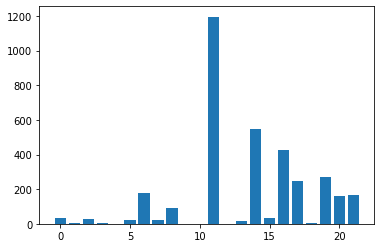

In [19]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
# f_regression scores
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
x_train_fs = fs.transform(x_train)
# transform test input data
x_test_fs = fs.transform(x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]),features[i])
  

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

* most important features = "sex" is male, age, and generation based on this list. 


Feature 0: 0.000000 year
Feature 1: 0.392748 population
Feature 2: 0.122287 HDI for year
Feature 3: 0.192416  gdp_for_year ($) 
Feature 4: 0.175648 gdp_per_capita ($)
Feature 5: 0.007506 africa_enc
Feature 6: 0.018149 europe_enc
Feature 7: 0.009032 asia_enc
Feature 8: 0.024250 NA_enc
Feature 9: 0.009117 SA_enc
Feature 10: 0.020100 oceania_enc
Feature 11: 0.152123 sex_male
Feature 12: 0.017504 age_25-34 years
Feature 13: 0.002478 age_35-54 years
Feature 14: 0.225813 age_5-14 years
Feature 15: 0.015822 age_55-74 years
Feature 16: 0.033881 age_75+ years
Feature 17: 0.016741 generation_G.I. Generation
Feature 18: 0.018786 generation_Generation X
Feature 19: 0.119208 generation_Generation Z
Feature 20: 0.014015 generation_Millenials
Feature 21: 0.027055 generation_Silent


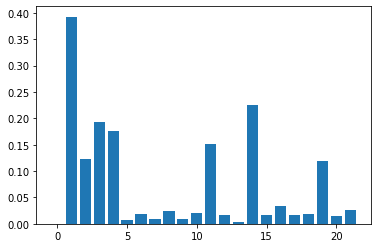

In [20]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
# mutual_info_regression
# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
x_train_fs = fs.transform(x_train)
# transform test input data
x_test_fs = fs.transform(x_test)
# what are scores for the features (other than countries)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]),features[i])
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

* the most improtant features from this list of mutual information is: 
 

0. population
1. age 5_14 
2. gdp_for_year
3. gdp_per_capita  
4. sex_male
5. generation X


 

# Linear Regression part 1 (All features vs. selected features only) 



> ***All Features***

In [21]:
from sklearn.metrics import mean_squared_error as mse
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
rmse = np.sqrt(mse(y_test,y_pred))
print ("RMSE test for all features Linear Regression model is", rmse)

RMSE test for all features Linear Regression model is 13.51688247986031




> ***Selected features only***



In [22]:
columns_selected = ['sex_male', 'age_5-14 years',  'population',
        'generation_Generation Z',' gdp_for_year ($) ', 'gdp_per_capita ($)']

x_sf = df2[['sex_male', 'age_5-14 years',  'population',
        'generation_Generation Z',' gdp_for_year ($) ', 'gdp_per_capita ($)']]
y_sf = df2['suicides/100k pop'].tolist()
scaler = StandardScaler()
features = x_sf.columns
x_scaled_sf = scaler.fit_transform(x_sf)

x_train_sf,x_test_sf, y_train_sf, y_test_sf = train_test_split(
    x_scaled_sf,
    y_sf,
    test_size = 0.3,
    shuffle = True,
    random_state = 0
)


In [23]:
model = LinearRegression()
model.fit(x_train_sf,y_train_sf)
y_pred_sf = model.predict(x_test_sf)
rmse = np.sqrt(mse(y_test_sf,y_pred_sf))
print ("RMSE test for selected features only Linear Regression model is", rmse)

RMSE test for selected features only Linear Regression model is 14.627480975349012


Feature selection in this way from mutual information did not affect the performance. 

# Linear Regression part 2 Actual models


In [ ]:
#regular model

model_lg = LinearRegression()
model_lg.fit(x_train_sf,y_train_sf)
y_pred_sf = model_lg.predict(x_test_sf)
rmse = np.sqrt(mse(y_test_sf,y_pred_sf))
print ("RMSE test for regular Linear Regression model is", rmse)
rmse_10 = np.average(cross_val_score(model_lg, x_train_sf, y_train_sf, cv=10, scoring = "neg_mean_squared_error"))
print ("10 fold cross validation average rmse", rmse_10)

RMSE test for regular Linear Regression model is 14.627480975349012
10 fold cross validation average rmse -229.4344153735532


In [ ]:
model_ridge = Ridge(alpha=0.5)
model_ridge.fit(x_train_sf,y_train_sf)
y_pred_sf = model_ridge.predict(x_test_sf)
rmse = np.sqrt(mse(y_test_sf,y_pred_sf))
print ("RMSE test for Ridge Linear Regression model is", rmse)
rmse_10 = np.average(cross_val_score(model_ridge, x_train_sf, y_train_sf, cv=10, scoring = "neg_mean_squared_error"))
print ("10 fold cross validation average rmse", rmse_10)

RMSE test for Ridge Linear Regression model is 14.627468047166278
10 fold cross validation average rmse -229.434390639911


In [ ]:
model_lasso = Lasso(alpha = 0.1)
model_lasso.fit(x_train_sf,y_train_sf)
y_pred_sf = model_lasso.predict(x_test_sf)
rmse = np.sqrt(mse(y_test_sf,y_pred_sf))
print ("RMSE test for Lasso Linear Regression model is", rmse)
rmse_10 = np.average(cross_val_score(model_lasso, x_train_sf, y_train_sf, cv=10, scoring = "neg_mean_squared_error"))
print ("10 fold cross validation average rmse", rmse_10)

RMSE test for Lasso Linear Regression model is 14.629374144606162
10 fold cross validation average rmse -229.57596615079402


In [ ]:
y_train_sf=np.array(y_train_sf)
kf=KFold(n_splits = 10)
average_val_RMSE =[]
average_train_RMSE =[]
for train_index, test_index in kf.split(x_train_sf, y_train_sf):
    X_train, X_test = x_train_sf[train_index], x_train_sf[test_index]
    y_train, y_test = y_train_sf[train_index], y_train_sf[test_index]
    model_lg = LinearRegression()
    model_lg.fit(x_train_sf,y_train_sf)
    y_pred_train = model_lg.predict(X_train)
    y_pred_test = model_lg.predict(X_test)
    train_rmse = np.sqrt(mse(y_train, y_pred_train))
    val_rmse = np.sqrt(mse(y_test, y_pred_test))
    average_train_RMSE.append(train_rmse)
    average_val_RMSE.append(val_rmse)

print('Regular Linear Regression average training error is', sum(average_train_RMSE)/10)
print('Regular Linear Regression validation error is', sum(average_val_RMSE)/10)

Regular Linear Regression average training error is 13.996408412124222
Regular Linear Regression validation error is 13.937760273448296


In [ ]:
y_train_sf=np.array(y_train_sf)
kf=KFold(n_splits = 10)
average_val_RMSE =[]
average_train_RMSE =[]
for train_index, test_index in kf.split(x_train_sf, y_train_sf):
    X_train, X_test = x_train_sf[train_index], x_train_sf[test_index]
    y_train, y_test = y_train_sf[train_index], y_train_sf[test_index]
    model_ridge = Ridge(alpha=0.5)
    model_ridge.fit(x_train_sf,y_train_sf)
    y_pred_train = model_ridge.predict(X_train)
    y_pred_test = model_ridge.predict(X_test)
    train_rmse = np.sqrt(mse(y_train, y_pred_train))
    val_rmse = np.sqrt(mse(y_test, y_pred_test))
    average_train_RMSE.append(train_rmse)
    average_val_RMSE.append(val_rmse)

print('Ridge Linear Regression average training error is', sum(average_train_RMSE)/10)
print('Ridge Linear Regression validation error is', sum(average_val_RMSE)/10)

Ridge Linear Regression average training error is 13.996409034634999
Ridge Linear Regression validation error is 13.937761863226774


In [ ]:
y_train_sf=np.array(y_train_sf)
kf=KFold(n_splits = 10)
average_val_RMSE =[]
average_train_RMSE =[]
for train_index, test_index in kf.split(x_train_sf, y_train_sf):
    X_train, X_test = x_train_sf[train_index], x_train_sf[test_index]
    y_train, y_test = y_train_sf[train_index], y_train_sf[test_index]
    model_lasso = Lasso(alpha = 0.1)
    model_lasso.fit(x_train_sf,y_train_sf)
    y_pred_train = model_lasso.predict(X_train)
    y_pred_test = model_lasso.predict(X_test)
    train_rmse = np.sqrt(mse(y_train, y_pred_train))
    val_rmse = np.sqrt(mse(y_test, y_pred_test))
    average_train_RMSE.append(train_rmse)
    average_val_RMSE.append(val_rmse)

print('Lasso Linear Regression average training error is', sum(average_train_RMSE)/10)
print('Lasso Linear Regression validation error is', sum(average_val_RMSE)/10)

Lasso Linear Regression average training error is 14.02496417715707
Lasso Linear Regression validation error is 13.96557715520255


In [ ]:
from scipy import stats
p_value=[]
for i in range(x_train_sf.shape[1]):
    print(x.columns[i])
    res=stats.linregress(x_train_sf[:, i], y_train_sf)
    print('p_value is', res.pvalue)
    p_value.append(res.pvalue)

year
p_value is 1.5735134465736444e-238
population
p_value is 2.0503838756573697e-115
HDI for year
p_value is 0.06888406676013553
 gdp_for_year ($) 
p_value is 1.1089846959602317e-59
gdp_per_capita ($)
p_value is 0.085542589546218
africa_enc
p_value is 0.9921360265173685


# Polynomial Regression

In [27]:
poly = PolynomialFeatures(degree=5)
feat_poly = poly.fit_transform(x_train_sf)
test_poly = poly.fit_transform(x_test_sf)
feat_poly.shape

(5854, 462)

In [ ]:
poly_feature_name = poly.get_feature_names(x.columns)
#### print top 5 features 
index = (-fs.scores_).argsort()[:5]
print(index)
for i in index:
  print(poly_feature_name[i])

In [ ]:
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(feat_poly, y_train_sf)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
  
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()
print(fs.scores_.sort())

In [ ]:
#regular model
model_lg = LinearRegression()
model_lg.fit(feat_poly,y_train_sf)
model_lg.score(test_poly, y_test_sf)
rmse = np.sqrt(mse(y_test_sf,model_lg.predict(test_poly)))
print ("RMSE test for polynomial Regression model is", rmse)

RMSE test for polynomial Regression model is 16.954075944416694


In [ ]:
y_train_sf=np.array(y_train_sf)
kf=KFold(n_splits = 10)
average_val_RMSE =[]
average_train_RMSE =[]
for train_index, test_index in kf.split(x_train_sf, y_train_sf):
    X_train, X_test = x_train_sf[train_index], x_train_sf[test_index]
    y_train, y_test = y_train_sf[train_index], y_train_sf[test_index]
    model_lg = LinearRegression()
    model_lg.fit(feat_poly,y_train_sf)
    y_pred_train = model_mlp.predict(X_train)
    y_pred_test = model_mlp.predict(X_test)
    train_rmse = np.sqrt(mse(y_train, y_pred_train))
    val_rmse = np.sqrt(mse(y_test, y_pred_test))
    average_train_RMSE.append(train_rmse)
    average_val_RMSE.append(val_rmse)

print('Polynomial average training error is', sum(average_train_RMSE)/10)
print('Polynomial validation error is', sum(average_val_RMSE)/10)

Polynomial average training error is 11.47612007351888
Polynomial validation error is 11.438038144155817


# Neural Network 

In [ ]:
from sklearn.model_selection import GridSearchCV
#search_space_mlp= {
    'hidden_layer_sizes': [[50, 25, 1], [50, 25, 12, 1], [50, 27, 1]],
    'alpha': [0.0001, 0.001, 0.01],
    'batch_size': [200, 300, 400],
    'beta_1': [0.2, 0.5, 0.9],
    'beta_2': [0.3, 0.5, 0.9]
}

search_mlp = GridSearchCV(MLPRegressor(max_iter=300),search_space_mlp, scoring='neg_root_mean_squared_error')
search_mlp.fit(np.asarray(x_train_sf), y_train_sf)
search_mlp

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
model_mlp = MLPRegressor(solver='adam',  alpha=0.01,verbose=True, random_state=1)
model_mlp.fit(x_train_sf, y_train_sf)
rmse = np.sqrt(mse(y_test_sf,model_mlp.predict(x_test_sf)))
print ("RMSE test for Neural Network model is", rmse)

Iteration 1, loss = 217.95897393
Iteration 2, loss = 207.38728319
Iteration 3, loss = 194.62831235
Iteration 4, loss = 179.30356353
Iteration 5, loss = 161.99209496
Iteration 6, loss = 144.72733750
Iteration 7, loss = 130.04505098
Iteration 8, loss = 120.36310853
Iteration 9, loss = 114.91221411
Iteration 10, loss = 112.40887765
Iteration 11, loss = 111.21138518
Iteration 12, loss = 110.60801919
Iteration 13, loss = 110.23482033
Iteration 14, loss = 110.02615236
Iteration 15, loss = 109.87012246
Iteration 16, loss = 109.77935614
Iteration 17, loss = 109.75105919
Iteration 18, loss = 109.56451967
Iteration 19, loss = 109.56086821
Iteration 20, loss = 109.46490672
Iteration 21, loss = 109.39170024
Iteration 22, loss = 109.36616768
Iteration 23, loss = 109.27332209
Iteration 24, loss = 109.21262996
Iteration 25, loss = 109.16587422
Iteration 26, loss = 109.11564393
Iteration 27, loss = 109.07180520
Iteration 28, loss = 109.03955914
Iteration 29, loss = 109.00739144
Iteration 30, loss = 10

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [26]:
y_train_sf=np.array(y_train_sf)
kf=KFold(n_splits = 10)
average_val_RMSE =[]
average_train_RMSE =[]
for train_index, test_index in kf.split(x_train_sf, y_train_sf):
    X_train, X_test = x_train_sf[train_index], x_train_sf[test_index]
    y_train, y_test = y_train_sf[train_index], y_train_sf[test_index]
    model_mlp = MLPRegressor(solver='adam',  alpha=0.01,verbose=True, random_state=1)
    model_mlp.fit(x_train_sf, y_train_sf)
    y_pred_train = model_mlp.predict(X_train)
    y_pred_test = model_mlp.predict(X_test)
    train_rmse = np.sqrt(mse(y_train, y_pred_train))
    val_rmse = np.sqrt(mse(y_test, y_pred_test))
    average_train_RMSE.append(train_rmse)
    average_val_RMSE.append(val_rmse)

print('MLP average training error is', sum(average_train_RMSE)/10)
print('MLP validation error is', sum(average_val_RMSE)/10)

Iteration 1, loss = 217.95897393
Iteration 2, loss = 207.38728319
Iteration 3, loss = 194.62831235
Iteration 4, loss = 179.30356353
Iteration 5, loss = 161.99209496
Iteration 6, loss = 144.72733750
Iteration 7, loss = 130.04505098
Iteration 8, loss = 120.36310853
Iteration 9, loss = 114.91221411
Iteration 10, loss = 112.40887765
Iteration 11, loss = 111.21138518
Iteration 12, loss = 110.60801919
Iteration 13, loss = 110.23482033
Iteration 14, loss = 110.02615236
Iteration 15, loss = 109.87012246
Iteration 16, loss = 109.77935614
Iteration 17, loss = 109.75105919
Iteration 18, loss = 109.56451967
Iteration 19, loss = 109.56086821
Iteration 20, loss = 109.46490672
Iteration 21, loss = 109.39170024
Iteration 22, loss = 109.36616768
Iteration 23, loss = 109.27332209
Iteration 24, loss = 109.21262996
Iteration 25, loss = 109.16587422
Iteration 26, loss = 109.11564393
Iteration 27, loss = 109.07180520
Iteration 28, loss = 109.03955914
Iteration 29, loss = 109.00739144
Iteration 30, loss = 10

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 217.95897393
Iteration 2, loss = 207.38728319
Iteration 3, loss = 194.62831235
Iteration 4, loss = 179.30356353
Iteration 5, loss = 161.99209496
Iteration 6, loss = 144.72733750
Iteration 7, loss = 130.04505098
Iteration 8, loss = 120.36310853
Iteration 9, loss = 114.91221411
Iteration 10, loss = 112.40887765
Iteration 11, loss = 111.21138518
Iteration 12, loss = 110.60801919
Iteration 13, loss = 110.23482033
Iteration 14, loss = 110.02615236
Iteration 15, loss = 109.87012246
Iteration 16, loss = 109.77935614
Iteration 17, loss = 109.75105919
Iteration 18, loss = 109.56451967
Iteration 19, loss = 109.56086821
Iteration 20, loss = 109.46490672
Iteration 21, loss = 109.39170024
Iteration 22, loss = 109.36616768
Iteration 23, loss = 109.27332209
Iteration 24, loss = 109.21262996
Iteration 25, loss = 109.16587422
Iteration 26, loss = 109.11564393
Iteration 27, loss = 109.07180520
Iteration 28, loss = 109.03955914
Iteration 29, loss = 109.00739144
Iteration 30, loss = 10

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 207.38728319
Iteration 3, loss = 194.62831235
Iteration 4, loss = 179.30356353
Iteration 5, loss = 161.99209496
Iteration 6, loss = 144.72733750
Iteration 7, loss = 130.04505098
Iteration 8, loss = 120.36310853
Iteration 9, loss = 114.91221411
Iteration 10, loss = 112.40887765
Iteration 11, loss = 111.21138518
Iteration 12, loss = 110.60801919
Iteration 13, loss = 110.23482033
Iteration 14, loss = 110.02615236
Iteration 15, loss = 109.87012246
Iteration 16, loss = 109.77935614
Iteration 17, loss = 109.75105919
Iteration 18, loss = 109.56451967
Iteration 19, loss = 109.56086821
Iteration 20, loss = 109.46490672
Iteration 21, loss = 109.39170024
Iteration 22, loss = 109.36616768
Iteration 23, loss = 109.27332209
Iteration 24, loss = 109.21262996
Iteration 25, loss = 109.16587422
Iteration 26, loss = 109.11564393
Iteration 27, loss = 109.07180520
Iteration 28, loss = 109.03955914
Iteration 29, loss = 109.00739144
Iteration 30, loss = 108.92590158
Iteration 31, loss = 1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 194.62831235
Iteration 4, loss = 179.30356353
Iteration 5, loss = 161.99209496
Iteration 6, loss = 144.72733750
Iteration 7, loss = 130.04505098
Iteration 8, loss = 120.36310853
Iteration 9, loss = 114.91221411
Iteration 10, loss = 112.40887765
Iteration 11, loss = 111.21138518
Iteration 12, loss = 110.60801919
Iteration 13, loss = 110.23482033
Iteration 14, loss = 110.02615236
Iteration 15, loss = 109.87012246
Iteration 16, loss = 109.77935614
Iteration 17, loss = 109.75105919
Iteration 18, loss = 109.56451967
Iteration 19, loss = 109.56086821
Iteration 20, loss = 109.46490672
Iteration 21, loss = 109.39170024
Iteration 22, loss = 109.36616768
Iteration 23, loss = 109.27332209
Iteration 24, loss = 109.21262996
Iteration 25, loss = 109.16587422
Iteration 26, loss = 109.11564393
Iteration 27, loss = 109.07180520
Iteration 28, loss = 109.03955914
Iteration 29, loss = 109.00739144
Iteration 30, loss = 108.92590158
Iteration 31, loss = 108.90119730
Iteration 32, loss = 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 7, loss = 130.04505098
Iteration 8, loss = 120.36310853
Iteration 9, loss = 114.91221411
Iteration 10, loss = 112.40887765
Iteration 11, loss = 111.21138518
Iteration 12, loss = 110.60801919
Iteration 13, loss = 110.23482033
Iteration 14, loss = 110.02615236
Iteration 15, loss = 109.87012246
Iteration 16, loss = 109.77935614
Iteration 17, loss = 109.75105919
Iteration 18, loss = 109.56451967
Iteration 19, loss = 109.56086821
Iteration 20, loss = 109.46490672
Iteration 21, loss = 109.39170024
Iteration 22, loss = 109.36616768
Iteration 23, loss = 109.27332209
Iteration 24, loss = 109.21262996
Iteration 25, loss = 109.16587422
Iteration 26, loss = 109.11564393
Iteration 27, loss = 109.07180520
Iteration 28, loss = 109.03955914
Iteration 29, loss = 109.00739144
Iteration 30, loss = 108.92590158
Iteration 31, loss = 108.90119730
Iteration 32, loss = 108.91695553
Iteration 33, loss = 108.82988753
Iteration 34, loss = 108.80568912
Iteration 35, loss = 108.78365477
Iteration 36, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 3, loss = 194.62831235
Iteration 4, loss = 179.30356353
Iteration 5, loss = 161.99209496
Iteration 6, loss = 144.72733750
Iteration 7, loss = 130.04505098
Iteration 8, loss = 120.36310853
Iteration 9, loss = 114.91221411
Iteration 10, loss = 112.40887765
Iteration 11, loss = 111.21138518
Iteration 12, loss = 110.60801919
Iteration 13, loss = 110.23482033
Iteration 14, loss = 110.02615236
Iteration 15, loss = 109.87012246
Iteration 16, loss = 109.77935614
Iteration 17, loss = 109.75105919
Iteration 18, loss = 109.56451967
Iteration 19, loss = 109.56086821
Iteration 20, loss = 109.46490672
Iteration 21, loss = 109.39170024
Iteration 22, loss = 109.36616768
Iteration 23, loss = 109.27332209
Iteration 24, loss = 109.21262996
Iteration 25, loss = 109.16587422
Iteration 26, loss = 109.11564393
Iteration 27, loss = 109.07180520
Iteration 28, loss = 109.03955914
Iteration 29, loss = 109.00739144
Iteration 30, loss = 108.92590158
Iteration 31, loss = 108.90119730
Iteration 32, loss = 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 7, loss = 130.04505098
Iteration 8, loss = 120.36310853
Iteration 9, loss = 114.91221411
Iteration 10, loss = 112.40887765
Iteration 11, loss = 111.21138518
Iteration 12, loss = 110.60801919
Iteration 13, loss = 110.23482033
Iteration 14, loss = 110.02615236
Iteration 15, loss = 109.87012246
Iteration 16, loss = 109.77935614
Iteration 17, loss = 109.75105919
Iteration 18, loss = 109.56451967
Iteration 19, loss = 109.56086821
Iteration 20, loss = 109.46490672
Iteration 21, loss = 109.39170024
Iteration 22, loss = 109.36616768
Iteration 23, loss = 109.27332209
Iteration 24, loss = 109.21262996
Iteration 25, loss = 109.16587422
Iteration 26, loss = 109.11564393
Iteration 27, loss = 109.07180520
Iteration 28, loss = 109.03955914
Iteration 29, loss = 109.00739144
Iteration 30, loss = 108.92590158
Iteration 31, loss = 108.90119730
Iteration 32, loss = 108.91695553
Iteration 33, loss = 108.82988753
Iteration 34, loss = 108.80568912
Iteration 35, loss = 108.78365477
Iteration 36, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 2, loss = 207.38728319
Iteration 3, loss = 194.62831235
Iteration 4, loss = 179.30356353
Iteration 5, loss = 161.99209496
Iteration 6, loss = 144.72733750
Iteration 7, loss = 130.04505098
Iteration 8, loss = 120.36310853
Iteration 9, loss = 114.91221411
Iteration 10, loss = 112.40887765
Iteration 11, loss = 111.21138518
Iteration 12, loss = 110.60801919
Iteration 13, loss = 110.23482033
Iteration 14, loss = 110.02615236
Iteration 15, loss = 109.87012246
Iteration 16, loss = 109.77935614
Iteration 17, loss = 109.75105919
Iteration 18, loss = 109.56451967
Iteration 19, loss = 109.56086821
Iteration 20, loss = 109.46490672
Iteration 21, loss = 109.39170024
Iteration 22, loss = 109.36616768
Iteration 23, loss = 109.27332209
Iteration 24, loss = 109.21262996
Iteration 25, loss = 109.16587422
Iteration 26, loss = 109.11564393
Iteration 27, loss = 109.07180520
Iteration 28, loss = 109.03955914
Iteration 29, loss = 109.00739144
Iteration 30, loss = 108.92590158
Iteration 31, loss = 1

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 5, loss = 161.99209496
Iteration 6, loss = 144.72733750
Iteration 7, loss = 130.04505098
Iteration 8, loss = 120.36310853
Iteration 9, loss = 114.91221411
Iteration 10, loss = 112.40887765
Iteration 11, loss = 111.21138518
Iteration 12, loss = 110.60801919
Iteration 13, loss = 110.23482033
Iteration 14, loss = 110.02615236
Iteration 15, loss = 109.87012246
Iteration 16, loss = 109.77935614
Iteration 17, loss = 109.75105919
Iteration 18, loss = 109.56451967
Iteration 19, loss = 109.56086821
Iteration 20, loss = 109.46490672
Iteration 21, loss = 109.39170024
Iteration 22, loss = 109.36616768
Iteration 23, loss = 109.27332209
Iteration 24, loss = 109.21262996
Iteration 25, loss = 109.16587422
Iteration 26, loss = 109.11564393
Iteration 27, loss = 109.07180520
Iteration 28, loss = 109.03955914
Iteration 29, loss = 109.00739144
Iteration 30, loss = 108.92590158
Iteration 31, loss = 108.90119730
Iteration 32, loss = 108.91695553
Iteration 33, loss = 108.82988753
Iteration 34, loss 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 5, loss = 161.99209496
Iteration 6, loss = 144.72733750
Iteration 7, loss = 130.04505098
Iteration 8, loss = 120.36310853
Iteration 9, loss = 114.91221411
Iteration 10, loss = 112.40887765
Iteration 11, loss = 111.21138518
Iteration 12, loss = 110.60801919
Iteration 13, loss = 110.23482033
Iteration 14, loss = 110.02615236
Iteration 15, loss = 109.87012246
Iteration 16, loss = 109.77935614
Iteration 17, loss = 109.75105919
Iteration 18, loss = 109.56451967
Iteration 19, loss = 109.56086821
Iteration 20, loss = 109.46490672
Iteration 21, loss = 109.39170024
Iteration 22, loss = 109.36616768
Iteration 23, loss = 109.27332209
Iteration 24, loss = 109.21262996
Iteration 25, loss = 109.16587422
Iteration 26, loss = 109.11564393
Iteration 27, loss = 109.07180520
Iteration 28, loss = 109.03955914
Iteration 29, loss = 109.00739144
Iteration 30, loss = 108.92590158
Iteration 31, loss = 108.90119730
Iteration 32, loss = 108.91695553
Iteration 33, loss = 108.82988753
Iteration 34, loss 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [25]:
model_mlp 

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=True,
             warm_start=False)

# Random Forest 

In [ ]:
model_rf = RandomForestRegressor(n_estimators=1000, max_features=11, max_depth = 17, oob_score=True, random_state=0)
model_rf.fit(x_train_sf, y_train_sf)
rmse = np.sqrt(mse(y_test_sf,model_rf.predict(x_test_sf)))
print ("RMSE test for Random Forest model is", rmse)

RMSE test for Random Forest model is 8.81937340045866


## best parameters

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


(7.943282347242816, 1258.9254117941675, 9.578441948136094, 10.723368362288088)

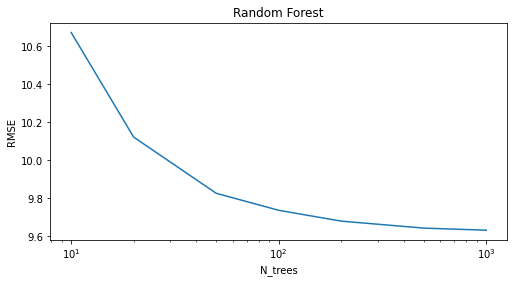

In [ ]:
rmses = []
num_trees = [10, 20, 50, 100, 200, 500, 1000]

for i in num_trees:
  model_rf = RandomForestRegressor(n_estimators=i, max_features=11, oob_score=True, random_state=0)
  model_rf.fit(x_train_sf, y_train_sf)
  rmse = np.sqrt(mse(y_test_sf,model_rf.predict(x_test_sf)))
  rmses.append(rmse)

#RMSE
plt.figure(figsize=(18, 4))

plt.subplot(121)
ax = plt.gca()
ax.plot(num_trees, rmses)
ax.set_xscale("log")
plt.xlabel("N_trees")
plt.ylabel("RMSE")
plt.title("Random Forest")
plt.axis("tight")

(0.55, 10.45, 8.757320014292837, 9.672063298040628)

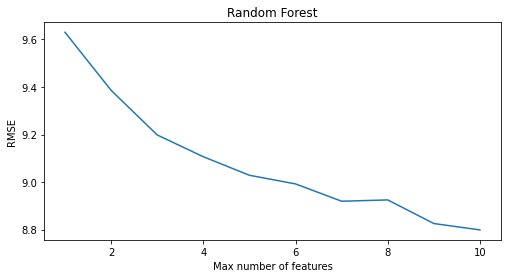

In [ ]:
rmses = []
max_features = [1,2,3,4,5,6,7,8,9,10,11]

for i in max_features:
  model_rf = RandomForestRegressor(n_estimators=1000, max_features=i, oob_score=True, random_state=0)
  model_rf.fit(x_train_sf, y_train_sf)
  rmse = np.sqrt(mse(y_test_sf,model_rf.predict(x_test_sf)))
  rmses.append(rmse)
  #RMSE
plt.figure(figsize=(18, 4))

plt.subplot(121)
ax = plt.gca()
ax.plot(max_features, rmses)
plt.xlabel("Max number of features")
plt.ylabel("RMSE")
plt.title("Random Forest")
plt.axis("tight")

(-0.9000000000000001, 40.9, 8.457177327989388, 15.546113413387385)

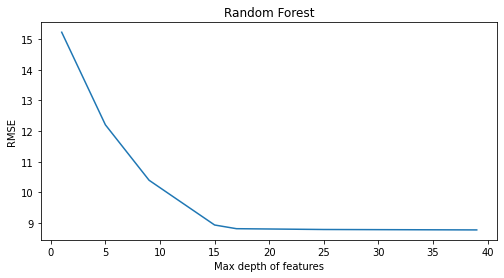

In [ ]:
rmses = []
max_depth = [1,5,9,15,17,25,39]

for i in max_depth:
  model_rf = RandomForestRegressor(n_estimators=1000, max_features=11, max_depth = i, oob_score=True, random_state=0)
  model_rf.fit(x_train_sf, y_train_sf)
  rmse = np.sqrt(mse(y_test_sf,model_rf.predict(x_test_sf)))
  rmses.append(rmse)
  #RMSE
plt.figure(figsize=(18, 4))

plt.subplot(121)
ax = plt.gca()
ax.plot(max_depth, rmses)
plt.xlabel("Max depth of features")
plt.ylabel("RMSE")
plt.title("Random Forest")
plt.axis("tight")

## feature selection comparision

In [ ]:
model_rf = RandomForestRegressor(n_estimators=200, max_features=11, max_depth = 17, oob_score=True, random_state=0)
model_rf.fit(x_train_sf, y_train_sf)
model_rf.oob_score_

0.734232067070367

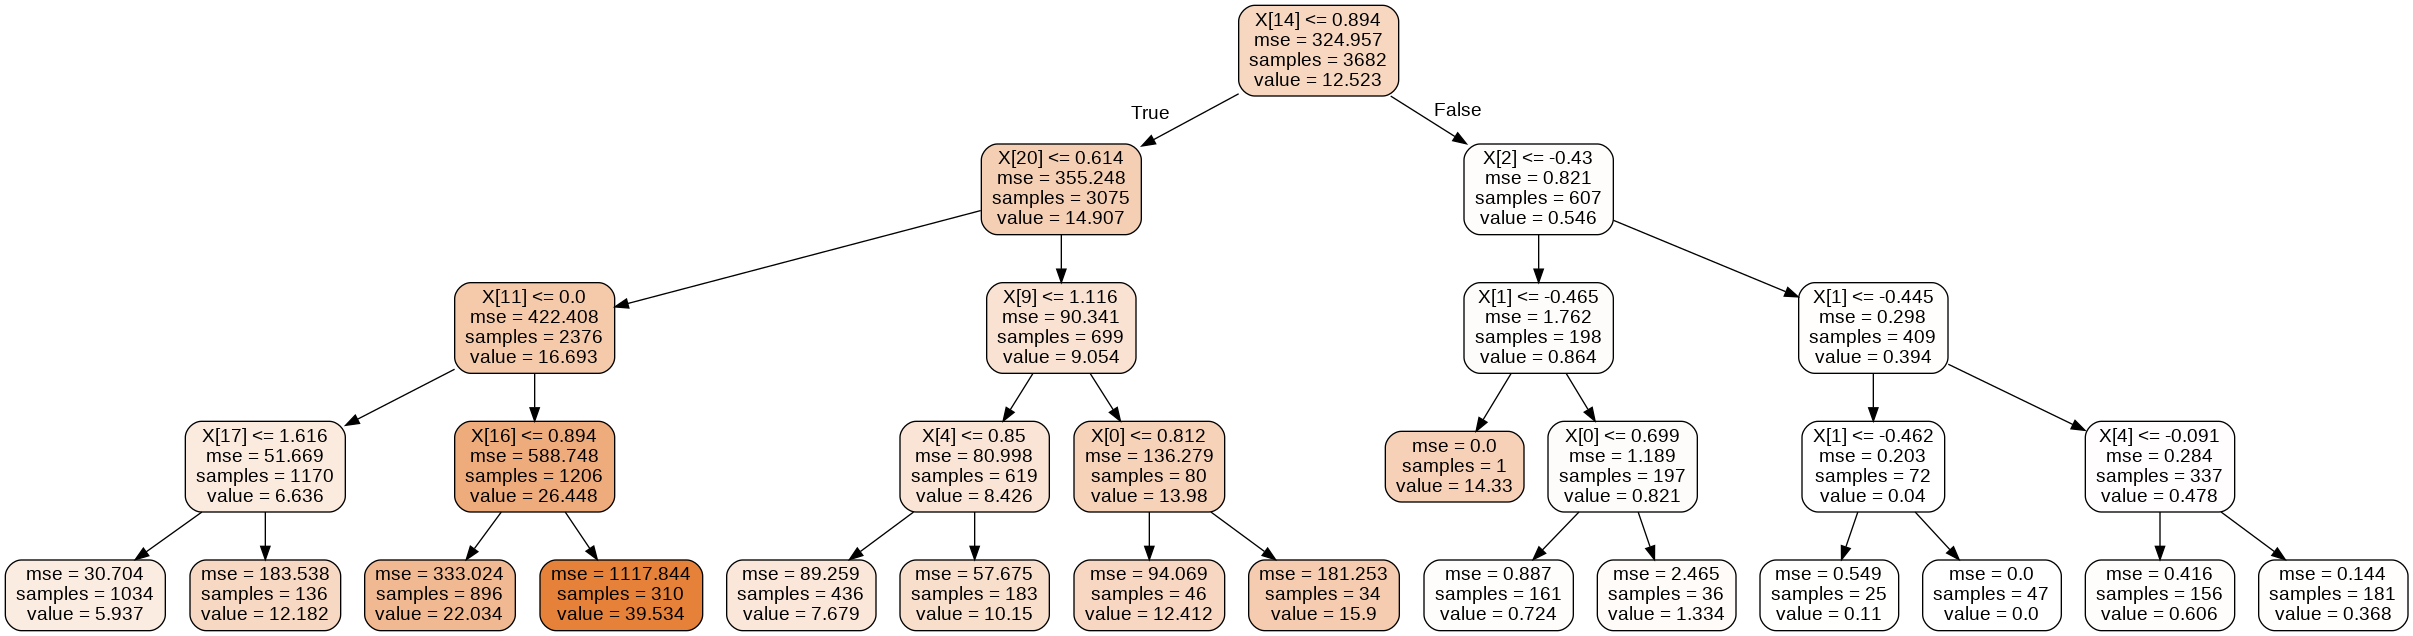

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import ensemble
from sklearn import tree
import pydotplus
import six
import os
import graphviz 
from subprocess import call
from sklearn.tree import export_graphviz

random_forest = ensemble.RandomForestRegressor(n_estimators=200, max_features=11, max_depth = 4, oob_score=True, random_state=0)
random_forest.fit(x_train_sf, y_train_sf)
export_graphviz(random_forest.estimators_[0], filled=True, rounded=True, out_file="tree.dot")
os.system('dot -Tpng tree.dot -o'+'_tree.png')

# Display in colab
from IPython.display import Image
Image(filename = '_tree.png')

In [ ]:
x.columns

Index(['year', 'population', 'HDI for year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'africa_enc', 'europe_enc', 'asia_enc', 'NA_enc',
       'SA_enc', 'oceania_enc', 'sex_male', 'age_25-34 years',
       'age_35-54 years', 'age_5-14 years', 'age_55-74 years', 'age_75+ years',
       'generation_G.I. Generation', 'generation_Generation X',
       'generation_Generation Z', 'generation_Millenials',
       'generation_Silent'],
      dtype='object')

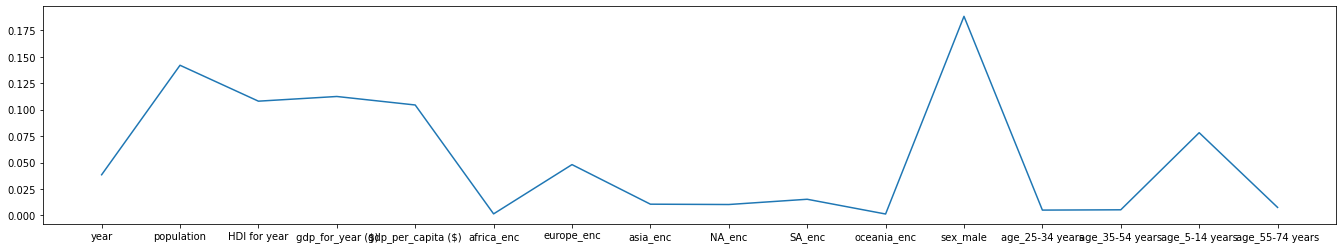

In [ ]:
plt.figure(figsize=(51, 4))
plt.subplot(121)
ax = plt.gca()
ax.plot(x.columns[:16], model_rf.feature_importances_[:16])
#highest feature importance print out 

from mutual information feature selection: 


* the most improtant features from this list of mutual information is: 
 
0. population
1. age 5_14 
2. gdp_for_year
3. gdp_per_capita  
4. sex_male
5. generation X


 

* the most improtant features from this random forest model is: 
0. sex_male
1. population 
2. HDI for year
2. gdp_for_year  
3. gdp_per_capita 




In [ ]:
kf=KFold(n_splits = 10)
average_val_RMSE =[]
average_train_RMSE =[]
for train_index, test_index in kf.split(x_train_sf, y_train_sf):
    X_train, X_test = x_train_sf[train_index], x_train_sf[test_index]
    y_train, y_test = y_train_sf[train_index], y_train_sf[test_index]
    model_rf = RandomForestRegressor(n_estimators=1000, max_features=11, max_depth = 17, oob_score=True, random_state=0)
    model_rf.fit(X_train, y_train)
    y_pred_train = model_rf.predict(X_train)
    y_pred_test = model_rf.predict(X_test)
    train_rmse = np.sqrt(mse(y_train, y_pred_train))
    val_rmse = np.sqrt(mse(y_test, y_pred_test))
    average_train_RMSE.append(train_rmse)
    average_val_RMSE.append(val_rmse)

print('RandomForest average training error is', sum(average_train_RMSE)/10)
print('RandomForest validation error is', sum(average_val_RMSE)/10)

RandomForest average training error is 3.6157790690006486
RandomForest validation error is 9.169508374927718


In [ ]:
from sklearn.model_selection import KFold
from sklearn import metrics
def kfold_validation(model, x, y):
    train_rmse = 0.0
    val_rmse = 0.0
    kf = KFold(n_splits=10)
    for train_i, val_i in kf.split(x):
        model.fit(x[train_i], y[train_i])
        train_pred = model.predict(x[train_i])
        val_pred = model.predict(x[val_i])
        train_rmse += np.sqrt(metrics.mean_squared_error(train_pred, y[train_i]))/10
        val_rmse += np.sqrt(metrics.mean_squared_error(val_pred, y[val_i]))/10
    print ('Training RMSE:{}'.format(train_rmse))
    print ('Validation RMSE:{}'.format(val_rmse))

# bike kfold validation 


In [ ]:
model_test = LinearRegression.fit

In [ ]:
bike_mlp = MLPRegressor(solver='adam',  alpha=0.001,verbose=True, random_state=1)
bike_randomforest = RandomForestRegressor(n_estimators=25, max_features=9, max_depth = 18, min_samples_split=2, oob_score=True, random_state=None)


In [ ]:

kfold_validation(bike_randomforest, bike_X,bike_y)

In [ ]:
poly = PolynomialFeatures(degree=3)
feat_poly = poly.fit_transform(bike_X)
model_bike_poly= LinearRegression()

kfold_validation(model_bike_poly, feat_poly ,bike_y)